# Demo for stable-diffusion-pytorch

## Install (takes about 1~5 minutes)

In [ ]:
# %cd /content
# !git clone https://github.com/kjsman/stable-diffusion-pytorch
git clone https://github.com/kjsman/stable-diffusion-pytorch

[WinError 2] The system cannot find the file specified: '/content'
c:\Users\Charles Xie\OneDrive\Desktop\Duke\Fall 2025\ECE 590 Practical ML\Project\stable-diffusion-pytorch


Cloning into 'stable-diffusion-pytorch'...


In [ ]:
# Note that all depencdencies of stable-diffusion-pytorch is pre-installed
# on Colab environment. This cell basically does nothing on Colab.
# %cd /content/stable-diffusion-pytorch
# %pip install -r requirements.txt
pip install -r requirements.txt

[WinError 3] The system cannot find the path specified: '/content/stable-diffusion-pytorch'
c:\Users\Charles Xie\OneDrive\Desktop\Duke\Fall 2025\ECE 590 Practical ML\Project\stable-diffusion-pytorch
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

print(torch.__version__)
print(torch.version.cuda)

CUDA available: True
CUDA device count: 1
GPU name: NVIDIA GeForce RTX 4060 Laptop GPU
2.5.1+cu121
12.1


In [2]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
print(torch.cuda.is_available())  # should be True now
print(torch.cuda.get_device_name(0))


True
NVIDIA GeForce RTX 4060 Laptop GPU


In [26]:
from stable_diffusion_pytorch.diffusion import Diffusion
import torch

# Recreate same architecture
model = Diffusion().to("cpu").eval()

# Load int8 weights (no need for safe_globals)
state_dict = torch.load("data_PTQ/ckpt/diffusion_int8_state.pt", map_location="cpu")

# Load directly
model.load_state_dict(state_dict, strict=False)

# Optional: inspect dtype
for k, v in state_dict.items():
    if isinstance(v, torch.Tensor) and v.is_quantized:
        print(k, v.qscheme())

print("✅ Loaded quantized state_dict safely!")


C:\Users\Charles Xie\AppData\Local\Temp\ipykernel_57136\1510171026.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("data_PTQ/ckpt/diffusion_int8_

RuntimeError: Error(s) in loading state_dict for Diffusion:
	While copying the parameter named "unet.encoders.0.0.weight", whose dimensions in the model are torch.Size([320, 4, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 4, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.1.0.conv_feature.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.1.0.conv_merged.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.1.1.conv_input.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.1.1.conv_output.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.2.0.conv_feature.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.2.0.conv_merged.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.2.1.conv_input.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.2.1.conv_output.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.3.0.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.4.0.conv_feature.weight", whose dimensions in the model are torch.Size([640, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.4.0.conv_merged.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.4.0.residual_layer.weight", whose dimensions in the model are torch.Size([640, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.4.1.conv_input.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.4.1.conv_output.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.5.0.conv_feature.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.5.0.conv_merged.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.5.1.conv_input.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.5.1.conv_output.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.6.0.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.7.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.7.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.7.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.7.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.7.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.8.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.8.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.8.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.8.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.9.0.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.10.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.10.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.11.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.11.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.2.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.2.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.0.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 2560, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.0.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.0.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 2560, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.1.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 2560, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.1.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.1.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 2560, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.2.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 2560, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.2.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.2.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 2560, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.2.1.conv.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.3.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 2560, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.3.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.3.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 2560, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.3.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.3.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.4.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 2560, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.4.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.4.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 2560, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.4.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.4.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1920, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1920, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 1920, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1920, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.2.conv.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.6.0.conv_feature.weight", whose dimensions in the model are torch.Size([640, 1920, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 1920, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.6.0.conv_merged.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.6.0.residual_layer.weight", whose dimensions in the model are torch.Size([640, 1920, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 1920, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.6.1.conv_input.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.6.1.conv_output.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.7.0.conv_feature.weight", whose dimensions in the model are torch.Size([640, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.7.0.conv_merged.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.7.0.residual_layer.weight", whose dimensions in the model are torch.Size([640, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.7.1.conv_input.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.7.1.conv_output.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.0.conv_feature.weight", whose dimensions in the model are torch.Size([640, 960, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 960, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.0.conv_merged.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.0.residual_layer.weight", whose dimensions in the model are torch.Size([640, 960, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 960, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.1.conv_input.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.1.conv_output.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.2.conv.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.9.0.conv_feature.weight", whose dimensions in the model are torch.Size([320, 960, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 960, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.9.0.conv_merged.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.9.0.residual_layer.weight", whose dimensions in the model are torch.Size([320, 960, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 960, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.9.1.conv_input.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.9.1.conv_output.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.10.0.conv_feature.weight", whose dimensions in the model are torch.Size([320, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.10.0.conv_merged.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.10.0.residual_layer.weight", whose dimensions in the model are torch.Size([320, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.10.1.conv_input.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.10.1.conv_output.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.11.0.conv_feature.weight", whose dimensions in the model are torch.Size([320, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.11.0.conv_merged.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.11.0.residual_layer.weight", whose dimensions in the model are torch.Size([320, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.11.1.conv_input.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.11.1.conv_output.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "final.conv.weight", whose dimensions in the model are torch.Size([4, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([4, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).

## Run

In [ ]:
from stable_diffusion_pytorch.clip import CLIP
from stable_diffusion_pytorch.encoder import Encoder
from stable_diffusion_pytorch.decoder import Decoder
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
clip = CLIP().to(device).eval()
encoder = Encoder().to(device).eval()
decoder = Decoder().to(device).eval()

clip.load_state_dict(torch.load("data/ckpt/clip.pt", map_location=device))
encoder.load_state_dict(torch.load("data/ckpt/encoder.pt", map_location=device))
decoder.load_state_dict(torch.load("data/ckpt/decoder.pt", map_location=device))


# # --- Load full quantized diffusion model safely ---
# from torch.serialization import safe_globals
# import torch.fx.graph_module
# import torch.ao.quantization.fx._lower_to_native_backend
# import torch.nn.modules.module
# import torch.nn.modules.normalization          # GroupNorm
# import torch.nn.modules.linear                 # ✅ Identity
# import torch.ao.nn.quantized.modules.linear
# import torch.ao.nn.quantized.modules.conv
# from torch.ao.nn.quantized.modules.linear import LinearPackedParams

# # ✅ Allow-list every internal class/function used in FX quantized models
# with safe_globals([
#     # FX graph + quantization I/O
#     torch.fx.graph_module.reduce_graph_module,
#     torch.ao.quantization.fx._lower_to_native_backend._save_packed_weight,
#     torch.ao.quantization.fx._lower_to_native_backend._load_packed_weight,

#     # Core module types
#     torch.nn.modules.module._WrappedHook,
#     torch.nn.modules.module.Module,
#     torch.nn.modules.normalization.GroupNorm,
#     torch.nn.modules.linear.Identity,           # ✅ newly added
#     torch.ScriptObject,

#     # Quantized layers
#     torch.ao.nn.quantized.modules.linear.Linear,
#     torch.ao.nn.quantized.modules.conv.Conv2d,
#     LinearPackedParams,
# ]):
#     diffusion_q = torch.load("data_PTQ/ckpt/diffusion_int8_full.pt", map_location=device)

# diffusion_q.to(device).eval()


from stable_diffusion_pytorch.diffusion import Diffusion
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# build same architecture
diffusion_q = Diffusion().to(device).eval()

# load weights (they are already int8 packed)
state_dict = torch.load("data_PTQ/ckpt/diffusion_int8_state.pt", map_location=device)
diffusion_q.load_state_dict(state_dict, strict=False)

print(f"✅ Quantized diffusion model (INT8 weights) loaded on {device}")

# --- Bundle all models ---
models_quantized = {
    "clip": clip,
    "encoder": encoder,
    "decoder": decoder,
    "diffusion": diffusion_q,
}


C:\Users\Charles Xie\AppData\Local\Temp\ipykernel_57136\2431998739.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  clip.load_state_dict(torch.load("data/ckpt/clip.pt", 

RuntimeError: Error(s) in loading state_dict for Diffusion:
	While copying the parameter named "unet.encoders.0.0.weight", whose dimensions in the model are torch.Size([320, 4, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 4, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.1.0.conv_feature.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.1.0.conv_merged.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.1.1.conv_input.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.1.1.conv_output.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.2.0.conv_feature.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.2.0.conv_merged.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.2.1.conv_input.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.2.1.conv_output.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.3.0.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.4.0.conv_feature.weight", whose dimensions in the model are torch.Size([640, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.4.0.conv_merged.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.4.0.residual_layer.weight", whose dimensions in the model are torch.Size([640, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.4.1.conv_input.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.4.1.conv_output.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.5.0.conv_feature.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.5.0.conv_merged.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.5.1.conv_input.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.5.1.conv_output.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.6.0.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.7.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.7.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.7.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.7.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.7.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.8.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.8.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.8.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.8.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.9.0.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.10.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.10.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.11.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.encoders.11.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.2.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.bottleneck.2.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.0.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 2560, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.0.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.0.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 2560, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.1.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 2560, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.1.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.1.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 2560, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.2.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 2560, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.2.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.2.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 2560, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.2.1.conv.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.3.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 2560, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.3.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.3.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 2560, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.3.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.3.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.4.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 2560, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.4.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.4.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 2560, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 2560, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.4.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.4.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.0.conv_feature.weight", whose dimensions in the model are torch.Size([1280, 1920, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1920, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.0.conv_merged.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.0.residual_layer.weight", whose dimensions in the model are torch.Size([1280, 1920, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1920, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.1.conv_input.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.1.conv_output.weight", whose dimensions in the model are torch.Size([1280, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.5.2.conv.weight", whose dimensions in the model are torch.Size([1280, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([1280, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.6.0.conv_feature.weight", whose dimensions in the model are torch.Size([640, 1920, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 1920, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.6.0.conv_merged.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.6.0.residual_layer.weight", whose dimensions in the model are torch.Size([640, 1920, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 1920, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.6.1.conv_input.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.6.1.conv_output.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.7.0.conv_feature.weight", whose dimensions in the model are torch.Size([640, 1280, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 1280, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.7.0.conv_merged.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.7.0.residual_layer.weight", whose dimensions in the model are torch.Size([640, 1280, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 1280, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.7.1.conv_input.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.7.1.conv_output.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.0.conv_feature.weight", whose dimensions in the model are torch.Size([640, 960, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 960, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.0.conv_merged.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.0.residual_layer.weight", whose dimensions in the model are torch.Size([640, 960, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 960, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.1.conv_input.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.1.conv_output.weight", whose dimensions in the model are torch.Size([640, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([640, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.8.2.conv.weight", whose dimensions in the model are torch.Size([640, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([640, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.9.0.conv_feature.weight", whose dimensions in the model are torch.Size([320, 960, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 960, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.9.0.conv_merged.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.9.0.residual_layer.weight", whose dimensions in the model are torch.Size([320, 960, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 960, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.9.1.conv_input.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.9.1.conv_output.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.10.0.conv_feature.weight", whose dimensions in the model are torch.Size([320, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.10.0.conv_merged.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.10.0.residual_layer.weight", whose dimensions in the model are torch.Size([320, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.10.1.conv_input.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.10.1.conv_output.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.11.0.conv_feature.weight", whose dimensions in the model are torch.Size([320, 640, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 640, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.11.0.conv_merged.weight", whose dimensions in the model are torch.Size([320, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([320, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.11.0.residual_layer.weight", whose dimensions in the model are torch.Size([320, 640, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 640, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.11.1.conv_input.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "unet.decoders.11.1.conv_output.weight", whose dimensions in the model are torch.Size([320, 320, 1, 1]) and whose dimensions in the checkpoint are torch.Size([320, 320, 1, 1]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).
	While copying the parameter named "final.conv.weight", whose dimensions in the model are torch.Size([4, 320, 3, 3]) and whose dimensions in the checkpoint are torch.Size([4, 320, 3, 3]), an exception occurred : ('Copying from quantized Tensor to non-quantized Tensor is not allowed, please use dequantize to get a float Tensor from a quantized Tensor',).

100%|██████████| 50/50 [05:17<00:00,  6.35s/it]


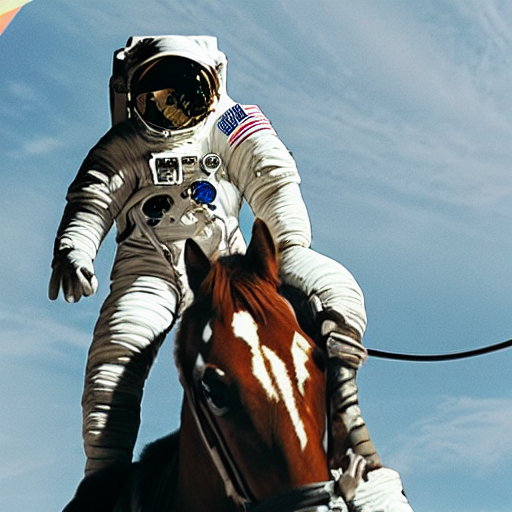

In [16]:
from stable_diffusion_pytorch import pipeline

prompt = "a photograph of an astronaut riding a horse"
prompts = [prompt]
uncond_prompt = ""
uncond_prompts = [uncond_prompt] if uncond_prompt else None
input_images = None

strength = 0.8
do_cfg = True
cfg_scale = 7.5
height = 512
width = 512
sampler = "k_lms"
n_inference_steps = 50
seed = 42

image = pipeline.generate(
    prompts=prompts,
    uncond_prompts=uncond_prompts,
    input_images=input_images,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    height=height,
    width=width,
    sampler=sampler,
    n_inference_steps=n_inference_steps,
    seed=seed,
    models=models_quantized,
    device=device,
    idle_device="cpu"
)[0]

# Show the image
from IPython.display import display
display(image)


In [ ]:
# #@title Preload models (takes about ~20 seconds on default settings)

# from stable_diffusion_pytorch import model_loader
# models = model_loader.preload_models('cuda')

100%|██████████| 50/50 [00:18<00:00,  2.71it/s]


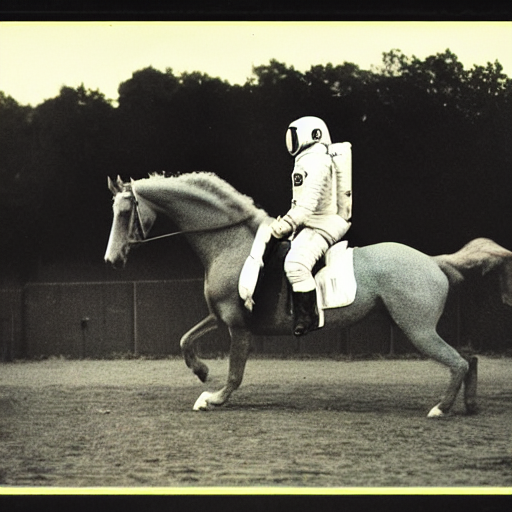

In [ ]:
# #@title Inference (takes about 30~40 seconds on default settings)

# from stable_diffusion_pytorch import pipeline

# prompt = "a photograph of an astronaut riding a horse"  #@param { type: "string" }
# prompts = [prompt]

# uncond_prompt = ""  #@param { type: "string" }
# uncond_prompts = [uncond_prompt] if uncond_prompt else None

# upload_input_image = False  #@param { type: "boolean" }
# input_images = None
# if upload_input_image:
#     from PIL import Image
#     from google.colab import files
#     print("Upload an input image:")
#     path = list(files.upload().keys())[0]
#     input_images = [Image.open(path)]

# strength = 0.8  #@param { type:"slider", min: 0, max: 1, step: 0.01 }

# do_cfg = True  #@param { type: "boolean" }
# cfg_scale = 7.5  #@param { type:"slider", min: 1, max: 14, step: 0.5 }
# height = 512  #@param { type: "integer" }
# width = 512  #@param { type: "integer" }
# sampler = "k_lms"  #@param ["k_lms", "k_euler", "k_euler_ancestral"]
# n_inference_steps = 50  #@param { type: "integer" }

# use_seed = False  #@param { type: "boolean" }
# if use_seed:
#     seed = 42  #@param { type: "integer" }
# else:
#     seed = None

# pipeline.generate(prompts=prompts, uncond_prompts=uncond_prompts,
#                   input_images=input_images, strength=strength,
#                   do_cfg=do_cfg, cfg_scale=cfg_scale,
#                   height=height, width=width, sampler=sampler,
#                   n_inference_steps=n_inference_steps, seed=seed,
#                   models=models, device='cuda', idle_device='cpu')[0]